In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import re
import numpy as np
from datetime import datetime
from datetime import date

In [100]:
plt.style.use('ggplot')

# Set default figure size for matplotlib
plt.rcParams['figure.figsize'] = (16, 8)

In [101]:
# connect to untap database, found here: 
#https://workbench.su92l.arvadosapi.com/collections/22d61dd43786c65cd175b04ad6954af0+3119/html/index.html#
conn = sqlite3.connect('Database/untap.db')
c = conn.cursor()

In [102]:
c.execute('SELECT * FROM demographics')
rows = c.fetchall()
data = pd.DataFrame(rows,columns=zip(*c.description)[0])

In [103]:
conn.close()

In [104]:
data.human_id = data.human_id.str.lower();
data.date_of_birth = data.date_of_birth.str.strip()
data.weight = data.weight.str.strip()
data.height = data.height.str.strip()

In [105]:
# remove characters within parans
g = lambda x:re.sub('\s\([^)]*\)','',x)
birthdate = data.date_of_birth.apply(g)

data['only_birth'] = data.date_of_birth.apply(g)

In [106]:
# replace empties with NaNs and convert to datetimes
data.only_birth = data['only_birth'].replace(r'\s+|^$', np.nan, regex=True)
data.only_birth = pd.to_datetime(data.only_birth,format='%Y-%m-%d')

# calculate current age
ageSec = date.today()-data.only_birth
data['only_age'] = ageSec/np.timedelta64(365,'D')

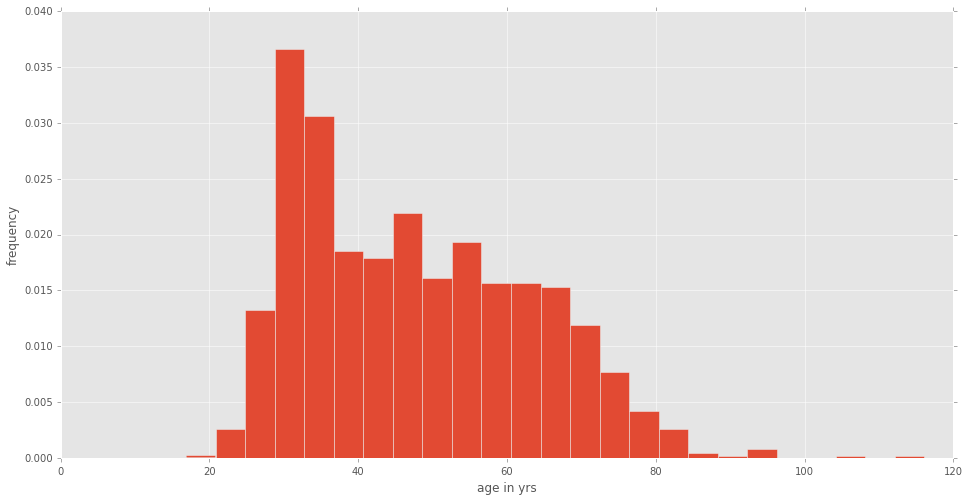

In [107]:
# find null values
idx = data.only_age.notnull()

# create the histogram
plt.hist(data.only_age[idx],25,normed=True)

#plt.title("Histogram of PGP Ages")
plt.xlabel("age in yrs")
plt.ylabel("frequency")
plt.savefig('Images/histogramAges.png',format='png',dpi=300)

In [108]:
# extract weight in kg
g2 = lambda x:re.sub('[^(]*\(','',x)
g3 = lambda x: re.sub('kg\)','',x)

only_weight = data.weight.apply(g2)
only_weight = only_weight.apply(g3)
data['only_weight'] = only_weight

# replace spaces/empties with NaNs
data.only_weight = data['only_weight'].replace(r'\s+|^$', np.nan, regex=True)

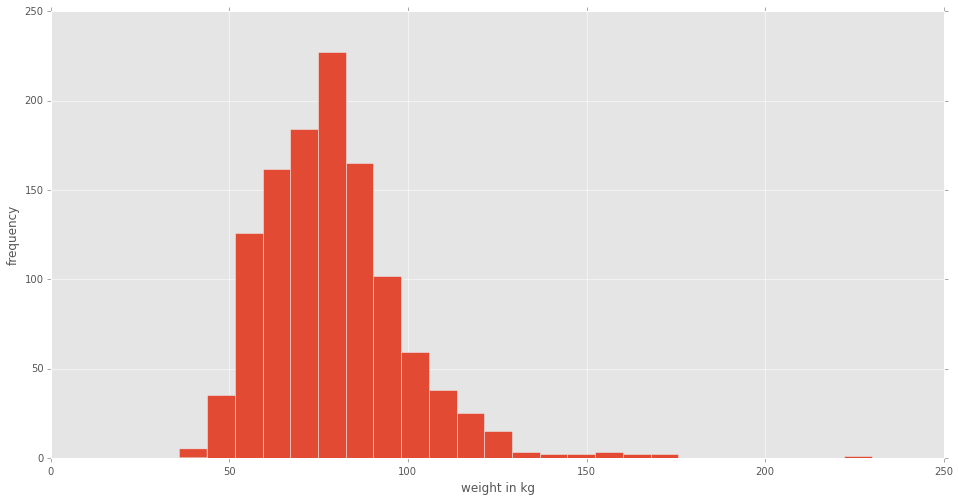

In [109]:
# create the histogram
idxW = data.only_weight.notnull()
plt.hist(data.only_weight.loc[idxW].astype(float), 25)

#plt.title("Histogram of PGP Weights")
plt.xlabel("weight in kg")
plt.ylabel("frequency")
plt.savefig('Images/histogramWeights.png',format='png',dpi=300)

In [110]:
# extract height in cm
g2 = lambda x:re.sub('[^(]*\(','',x)
g3 = lambda x: re.sub('cm\)','',x)

only_height = data.height.apply(g2)
only_height = only_height.apply(g3)
data['only_height'] = only_height

# replace spaces/blanks with NaNs
data.only_height = data['only_height'].replace(r'\s+|^$', np.nan, regex=True)

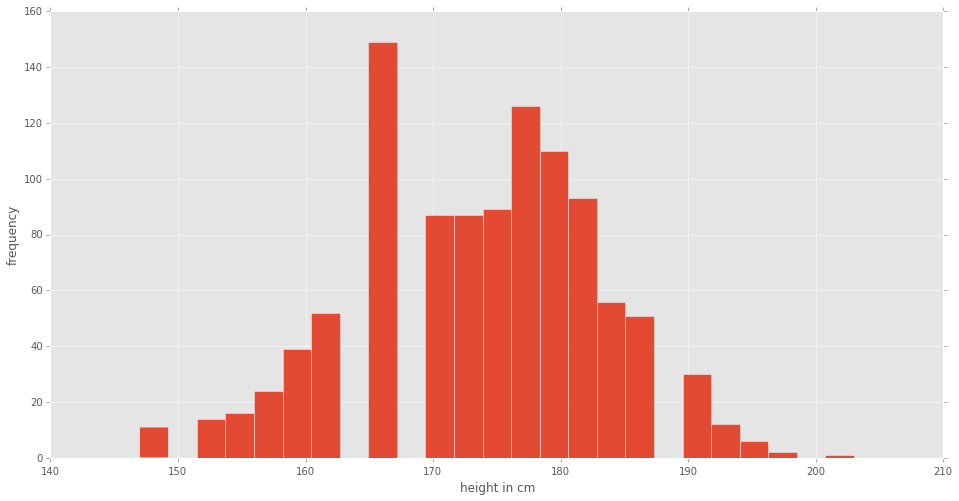

In [111]:
# create the histogram

idxH = data.only_height.notnull()
plt.hist(data.only_height.loc[idxH].astype(float), 25)
#plt.title("Histogram of PGP Heights")
plt.xlabel("height in cm")
plt.ylabel("frequency")
plt.savefig('Images/histogramHeights.png',format='png',dpi=300)